In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df = pd.read_csv('data/polished3.csv')
used_columns = ["Height", "BMI", "Age"]
bio_by_sport = df.groupby(['Event'])[used_columns].median().reset_index()

In [2]:
# Define average values for males and females
AVG_HEIGHT_MALE = 178.4  # cm
AVG_BMI_MALE = 25.5
AVG_AGE_MALE = 31

AVG_HEIGHT_FEMALE = 164.7  # cm
AVG_BMI_FEMALE = 24.7
AVG_AGE_FEMALE = 32

# Append global averages for both males and females
bio_by_sport = bio_by_sport._append({'Event': 'Global average Male',
                                      'Height': AVG_HEIGHT_MALE,
                                      'BMI': AVG_BMI_MALE,
                                      'Age': AVG_AGE_MALE}, ignore_index=True)

bio_by_sport = bio_by_sport._append({'Event': 'Global average Female',
                                      'Height': AVG_HEIGHT_FEMALE,
                                      'BMI': AVG_BMI_FEMALE,
                                      'Age': AVG_AGE_FEMALE}, ignore_index=True)

# Display the updated DataFrame
bio_by_sport.head()


,Event,Height,BMI,Age
0,Archery Men's Individual,178.0,23.671254,26.0
1,Archery Men's Team,180.0,23.766410,25.0
2,Archery Women's Individual,168.0,21.671258,25.0
3,Archery Women's Team,168.0,21.967120,24.0
4,"Athletics Men's 1,500 metres",178.0,20.661157,24.0


In [3]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Height', 'BMI', 'Age']

scaler = StandardScaler()

bio_by_sport[columns_to_normalize] = scaler.fit_transform(bio_by_sport[columns_to_normalize])

bio_by_sport.head()

,Event,Height,BMI,Age
0,Archery Men's Individual,0.427317,0.245585,0.230405
1,Archery Men's Team,0.671865,0.279135,-0.067635
2,Archery Women's Individual,-0.795419,-0.459553,-0.067635
3,Archery Women's Team,-0.795419,-0.355241,-0.365675
4,"Athletics Men's 1,500 metres",0.427317,-0.815685,-0.365675


In [4]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport[['Height', 'Age', 'BMI']])
    score = silhouette_score(bio_by_sport[['Height', 'Age', 'BMI']], clusters)
    silhouette_scores.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores})
silhouette_scores_df.sort_values(by='Score')

,k,Score
6,8,0.276228
7,9,0.293325
5,7,0.298281
8,10,0.300903
4,6,0.318689
2,4,0.328831
0,2,0.329094
1,3,0.365218
3,5,0.371718


In [5]:
kmeans = KMeans(n_clusters=9, random_state=42)
bio_by_sport['Cluster'] = kmeans.fit_predict(bio_by_sport[used_columns])
bio_by_sport.sort_values(by='Cluster')

,Event,Height,BMI,Age,Cluster
346,Tennis Women's Singles,-0.306324,-0.780396,-0.663715,0
47,Athletics Women's 100 metres,-1.039966,-0.845662,-0.663715,0
338,Taekwondo Women's Featherweight,-0.795419,-0.986332,-0.663715,0
335,Taekwondo Men's Flyweight,-0.184051,-1.187986,-0.961755,0
327,Synchronized Swimming Women's Team,-0.795419,-1.147143,-0.663715,0
...,...,...,...,...,...
383,"Wrestling Men's Light-Heavyweight, Freestyle",0.671865,1.583080,0.230405,8
364,Weightlifting Men's Middleweight,-0.673145,1.261759,-0.365675,8
380,"Wrestling Men's Heavyweight, Greco-Roman",1.283233,2.201346,0.528445,8
379,"Wrestling Men's Heavyweight, Freestyle",1.160959,2.201346,0.528445,8


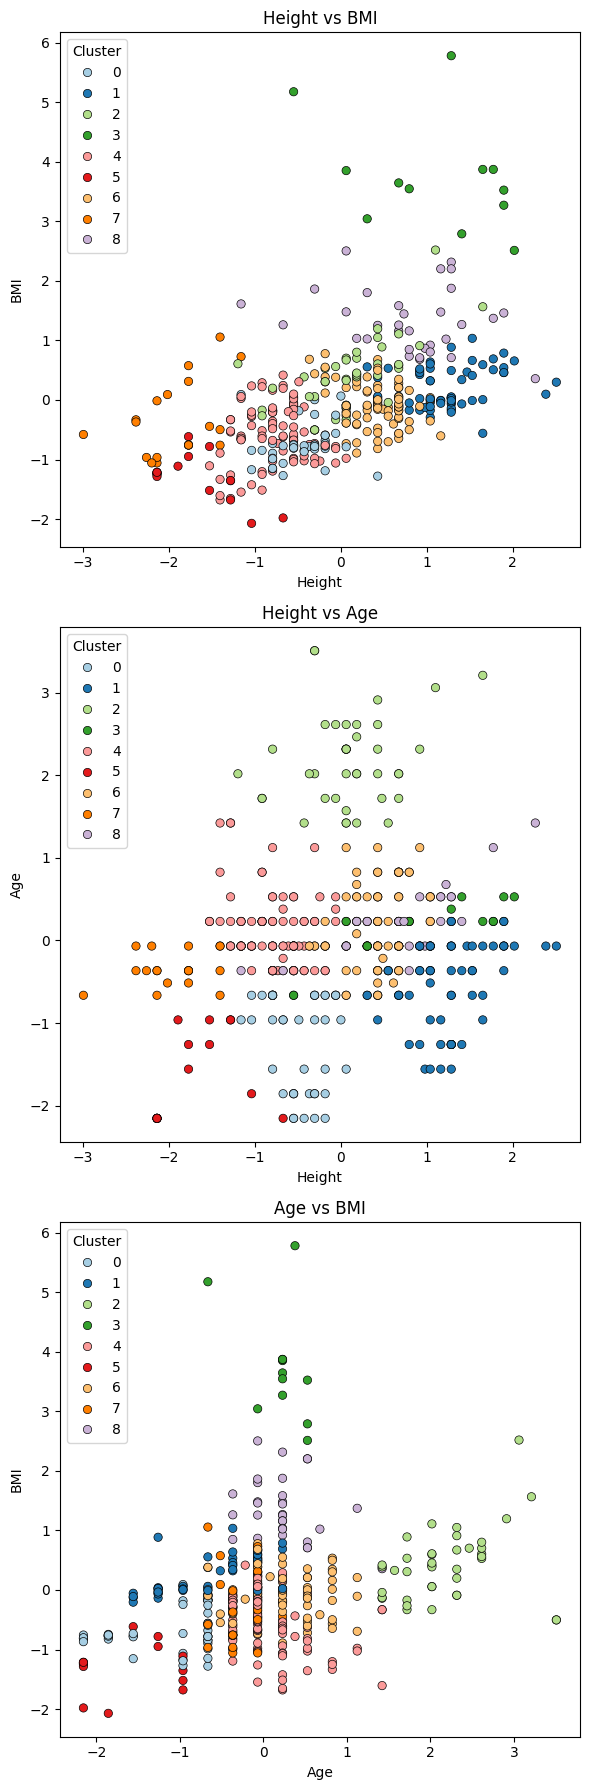

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=bio_by_sport, x='Height', y='BMI', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[0])
axes[0].set_title('Height vs BMI')

sns.scatterplot(data=bio_by_sport, x='Height', y='Age', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[1])
axes[1].set_title('Height vs Age')

sns.scatterplot(data=bio_by_sport, x='Age', y='BMI', hue='Cluster', palette='Paired', edgecolor='black', ax=axes[2])
axes[2].set_title('Age vs BMI')

plt.tight_layout()
plt.show()

In [7]:
import numpy as  np

target_row = bio_by_sport.loc[bio_by_sport['Event'] == 'Global average Male']

bio_by_sport['distance'] = bio_by_sport[used_columns].apply(
    lambda row: np.linalg.norm(row.values - target_row[used_columns].values), axis=1
)

df_sorted = bio_by_sport.sort_values(by='distance').reset_index(drop=True)

print(df_sorted[["Event", "Cluster", "distance"]])

                                        Event  Cluster  distance
0                         Global average Male        2  0.000000
1                       Golf Men's Individual        2  0.407643
2                  Shooting Men's Double Trap        2  0.418645
3         Sailing Mixed Three Person Keelboat        2  0.462196
4                      Sailing Mixed 6 metres        2  0.563211
..                                        ...      ...       ...
396           Gymnastics Women's Balance Beam        5  5.131560
397     Weightlifting Men's Super-Heavyweight        3  5.132678
398  Gymnastics Women's Individual All-Around        5  5.135519
399            Gymnastics Women's Horse Vault        5  5.141428
400        Gymnastics Women's Team All-Around        5  5.156089

[401 rows x 3 columns]


In [8]:
import numpy as  np

target_row = bio_by_sport.loc[bio_by_sport['Event'] == 'Global average Female']

bio_by_sport['distance'] = bio_by_sport[used_columns].apply(
    lambda row: np.linalg.norm(row.values - target_row[used_columns].values), axis=1
)

df_sorted = bio_by_sport.sort_values(by='distance').reset_index(drop=True)

print(df_sorted[["Event", "Cluster", "distance"]])

                                              Event  Cluster  distance
0                             Global average Female        2  0.000000
1                             Shooting Women's Trap        2  0.647851
2                      Shooting Women's Double Trap        2  0.879942
3                            Shooting Women's Skeet        2  0.964924
4                 Equestrianism Men's Jumping, Team        2  0.998007
..                                              ...      ...       ...
396          Rhythmic Gymnastics Women's Individual        5  4.712915
397  Wrestling Men's Super-Heavyweight, Greco-Roman        3  4.760952
398               Rhythmic Gymnastics Women's Group        5  4.937785
399         Weightlifting Women's Super-Heavyweight        3  5.334697
400           Weightlifting Men's Super-Heavyweight        3  5.964859

[401 rows x 3 columns]
